# Comparison Study of Outlier Detection
> 

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연

https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.lscp

https://pypi.org/project/pyod/

|Method|Category|JIT Enabled|Multicore|cited|
|:--|:--:|:--:|:--:|:--:|
|LOF (Breunig et al., 2000)|Proximity|No|Yes||
|kNN (Ramaswamy et al., 2000)|Proximity|No|Yes||
|AvgkNN (Angiulli and Pizzuti, 2002)|Proximity|No|Yes||
|CBLOF (He et al., 2003)|Proximity|Yes|No||
|OCSVM (Sch ̈olkopf et al., 2001)|Linear Model|No|No||
|LOCI (Papadimitriou et al., 2003)|Proximity|Yes|No|1157|
|PCA (Shyu et al., 2003)|Linear Model|No|No||
|MCD (Hardin and Rocke, 2004)|Linear Model|No|No||
|Feature Bagging (Lazarevic and Kumar, 2005)|Ensembling|No|Yes|705|
|ABOD (Kriegel et al., 2008)|Proximity|Yes|No|884|
|Isolation Forest (Liu et al., 2008)|Ensembling|No|Yes||
|HBOS (Goldstein and Dengel, 2012)|Proximity|Yes|No||
|SOS (Janssens et al., 2012)|Proximity|Yes|No||
|AutoEncoder (Sakurada and Yairi, 2014)|Neural Net|Yes|No||
|AOM (Aggarwal and Sathe, 2015)|Ensembling|No|No||
|MOA (Aggarwal and Sathe, 2015)|Ensembling|No|No||
|SO-GAAL (Liu et al., 2019)|Neural Net|No|No||
|MO-GAAL (Liu et al., 2019)|Neural Net|No|No||
|XGBOD (Zhao and Hryniewicki, 2018b)|Ensembling|No|Yes|93|
|LSCP (Zhao et al., 2019)|Ensembling|No|No|97|

**Linear**

|Method|Accuracy|Precision|Recall|F1 Score|
|:---|:---:|:---:|:---:|:---:|
|Proposed Method|0.839|**0.995**|0.835|0.908|
|LOF (Breunig et al., 2000)|0.882|0.974|0.900|0.935|
|OCSVM (Sch¨olkopf et al., 2001)|0.920|0.983|0.932|0.957|
|ABOD (Kriegel et al., 2008)|**0.962**|0.980|**0.980**|**0.980**|
|Isolation Forest (Liu et al., 2008)|0.813|0.987|0.814|0.892|
|HBOS (Goldstein and Dengel, 2012)|0.916|0.963|0.948|0.955|
|SO-GAAL (Liu et al., 2019)|0.880|0.957|0.915|0.935|
|MCD (Hardin and Rocke, 2004)|0.926|0.987|0.935|0.960|
|MO-GAAL (Liu et al., 2019)|0.876|0.957|0.911|0.933|
|LSCP (Zhao et al., 2019)|0.924|0.986|0.934|0.959|
|Feature Bagging (Lazarevic and Kumar, 2005)|0.922|0.984|0.933|0.958|

**one dimensional manifold**

|Method|Accuracy|Precision|Recall|F1 Score|
|:---|:---:|:---:|:---:|:---:|
|Proposed Method|**0.997**|**0.997**|**1.000**|**0.998**|
|LOF (Breunig et al., 2000)|0.886|0.987|0.892|0.937|
|OCSVM (Sch¨olkopf et al., 2001)|0.923|0.988|0.931|0.958|
|ABOD (Kriegel et al., 2008)|0.988|0.994|0.994|0.994|
|Isolation Forest (Liu et al., 2008)|0.477|0.989|0.455|0.623|
|HBOS (Goldstein and Dengel, 2012)|0.881|0.961|0.912|0.936|
|SO-GAAL (Liu et al., 2019)|0.950|0.950|1.000|0.974|
|MCD (Hardin and Rocke, 2004)|0.866|0.953|0.903|0.928|
|MO-GAAL (Liu et al., 2019)|0.879|0.958|0.913|0.935|
|LSCP (Zhao et al., 2019)|0.948|0.999|0.946|0.972|
|Feature Bagging (Lazarevic and Kumar, 2005)|0.902|0.973|0.922|0.947|

Bunny

|Method|Accuracy|Precision|Recall|F1 Score|
|:---|:---:|:---:|:---:|:---:|
|Proposed Method|**0.991**|**0.993**|**0.997**|**0.995**|
|LOF (Breunig et al., 2000)|0.918|0.954|0.959|0.957|
|OCSVM (Sch¨olkopf et al., 2001)|0.865|0.955|0.901|0.927|
|ABOD (Kriegel et al., 2008)|0.905|0.951|0.949|0.950|
|Isolation Forest (Liu et al., 2008)|0.761|0.953|0.789|0.863|
|HBOS (Goldstein and Dengel, 2012)|0.895|0.970|0.919|0.944|
|SO-GAAL (Liu et al., 2019)|0.952|0.952|1.000|0.975|
|MCD (Hardin and Rocke, 2004)|0.934|0.992|0.938|0.964|
|MO-GAAL (Liu et al., 2019)|0.952|0.952|1.000|0.975|
|LSCP (Zhao et al., 2019)|0.936|0.994|0.939|0.966|
|Feature Bagging (Lazarevic and Kumar, 2005)|0.919|0.984|0.930|0.956|

ref: https://scikit-learn.org/stable/modules/outlier_detection.html

https://conferenceindex.org/conferences/applied-statistics

**Inliers are labeled 1, while outliers are labeled -1**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.svm import OneClassSVM
from sklearn.linear_model import SGDOneClassSVM
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import make_pipeline

import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

import rpy2
import rpy2.robjects as ro 
from rpy2.robjects.vectors import FloatVector 
from rpy2.robjects.packages import importr

from sklearn.datasets import fetch_kddcup99, fetch_covtype, fetch_openml
from sklearn.preprocessing import LabelBinarizer

import tqdm

from pygsp import graphs, filters, plotting, utils

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

import plotly.graph_objects as go
from IPython.display import HTML

import plotly.express as px

from sklearn.covariance import EmpiricalCovariance, MinCovDet

from alibi_detect.od import IForest
# from pyod.models.iforest import IForest

from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
import seaborn as sns

from PyNomaly import loop

from sklearn import svm

from loci.loci import run_loci

from pyod.models.lscp import LSCP
from pyod.models.hbos import HBOS

from pyod.models.so_gaal import SO_GAAL
from pyod.models.mcd import MCD
from pyod.models.mo_gaal import MO_GAAL
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.ocsvm import OCSVM
from pyod.models.xgbod import XGBOD

from pyod.models.feature_bagging import FeatureBagging

2022-11-19 09:08:07.567470: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-19 09:08:07.567495: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## EbayesThresh

In [2]:
%load_ext rpy2.ipython

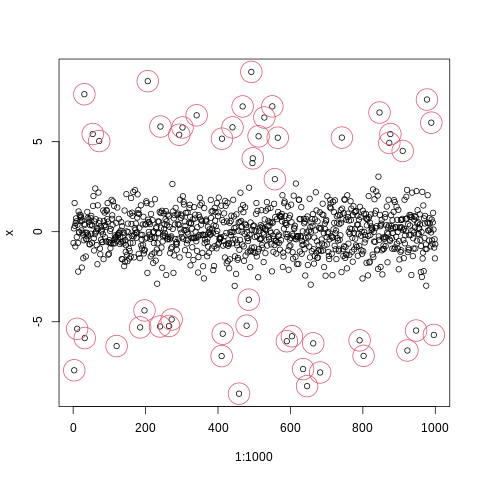

In [3]:
%%R
library(EbayesThresh)
set.seed(1)
epsilon = rnorm(1000)
signal = sample(c(runif(25,-7,-5), runif(25,5,7), rep(0,950)))
index_of_trueoutlier = which(signal!=0)
index_of_trueoutlier
x=signal+epsilon
plot(1:1000,x)
points(index_of_trueoutlier,x[index_of_trueoutlier],col=2,cex=4)

#plot(x,type='l')
#mu <- EbayesThresh::ebayesthresh(x,sdev=2)
#lines(mu,col=2,lty=2,lwd=2)

In [4]:
%R -o x
%R -o index_of_trueoutlier
%R -o signal

In [5]:
ebayesthresh = importr('EbayesThresh').ebayesthresh

In [6]:
xhat = np.array(ebayesthresh(FloatVector(x)))

In [7]:
# plt.plot(x)
# plt.plot(xhat)

In [8]:
outlier_true_index = index_of_trueoutlier

In [9]:
outlier_true_value = x[index_of_trueoutlier]

package와 비교를 위해 outlier는 -1, inlier는 1로 표시

In [10]:
outlier_true_one = signal.copy()

In [11]:
outlier_true_one = list(map(lambda x: -1 if x!=0 else 1,outlier_true_one))

## Linear

In [393]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [394]:
%%R
library(EbayesThresh)
set.seed(1)
epsilon = rnorm(1000)
signal_1 = sample(c(runif(25,-6,-1), runif(25,1,6), rep(0,950)))
index_of_trueoutlier_1 = which(signal_1!=0)
index_of_trueoutlier_1
x_1=signal_1+epsilon

In [395]:
%R -o x_1
%R -o index_of_trueoutlier_1
%R -o signal_1

In [396]:
ebayesthresh = importr('EbayesThresh').ebayesthresh

In [397]:
outlier_true_index_1 = index_of_trueoutlier_1

In [398]:
outlier_true_value_1 = x_1[index_of_trueoutlier_1]

In [399]:
outlier_true_one_1 = signal.copy()

In [400]:
outlier_true_one_1 = list(map(lambda x: -1 if x!=0 else 1,outlier_true_one_1))

In [401]:
_x_1 = np.linspace(0,2,1000)
_y1_1 = 5*_x_1
_y_1 = _y1_1 + x_1 # x is epsilon

In [402]:
_df=pd.DataFrame({'x':_x_1, 'y':_y_1})

In [403]:
X = np.array(_df)

### 1. Proposed Method

In [404]:
class SIMUL:
    def __init__(self,df):
        self.df = df
        self.y = df.y.to_numpy()
        #self.y1 = df.y1.to_numpy()
        self.x = df.x.to_numpy()
        self.n = len(self.y)
        self.W = w
    def _eigen(self):
        d= self.W.sum(axis=1)
        D= np.diag(d)
        self.L = np.diag(1/np.sqrt(d)) @ (D-self.W) @ np.diag(1/np.sqrt(d))
        self.lamb, self.Psi = np.linalg.eigh(self.L)
        self.Lamb = np.diag(self.lamb)      
    def fit(self,sd=5): # fit with ebayesthresh
        self._eigen()
        self.ybar = self.Psi.T @ self.y # fbar := graph fourier transform of f
        self.power = self.ybar**2 
        ebayesthresh = importr('EbayesThresh').ebayesthresh
        self.power_threshed=np.array(ebayesthresh(FloatVector(self.ybar**2),sd=sd))
        self.ybar_threshed = np.where(self.power_threshed>0,self.ybar,0)
        self.yhat = self.Psi@self.ybar_threshed
        self.df = self.df.assign(yHat = self.yhat)
        self.df = self.df.assign(Residual = self.df.y- self.df.yHat)

In [405]:
w=np.zeros((1000,1000))

In [406]:
for i in range(1000):
    for j in range(1000):
        if i==j :
            w[i,j] = 0
        elif np.abs(i-j) <= 1 : 
            w[i,j] = 1

In [407]:
_simul = SIMUL(_df)

In [408]:
_simul.fit(sd=20)

In [409]:
outlier_simul_first_index = np.array(_simul.df.query('Residual**2>2').reset_index()['index'])

In [410]:
outlier_simul_first_value = np.array(_simul.df.query('Residual**2>2').reset_index()['y'])

In [411]:
outlier_simul_one = (_simul.df['Residual']**2).tolist()

In [412]:
outlier_simul_one = list(map(lambda x: -1 if x > 2 else 1,outlier_simul_one))

In [413]:
conf_matrix = confusion_matrix(outlier_true_one_1, outlier_simul_one)

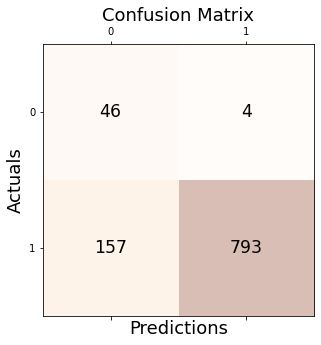

In [414]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [415]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one_1, outlier_simul_one))
print('Precision: %.3f' % precision_score(outlier_true_one_1, outlier_simul_one))
print('Recall: %.3f' % recall_score(outlier_true_one_1, outlier_simul_one))
print('F1 Score: %.3f' % f1_score(outlier_true_one_1, outlier_simul_one))

Accuracy: 0.839
Precision: 0.995
Recall: 0.835
F1 Score: 0.908


### 2. LOF

In [416]:
clf = LocalOutlierFactor(n_neighbors=2)

In [417]:
outlier_first_index = np.where(clf.fit_predict(X)==-1)

In [418]:
outlier_first_value = clf.fit_predict(X)[clf.fit_predict(X)==-1]

In [422]:
conf_matrix = confusion_matrix(outlier_true_one_1, clf.fit_predict(X))

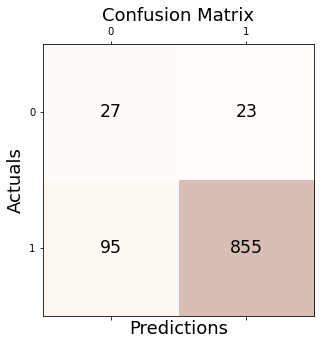

In [423]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [424]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one_1, clf.fit_predict(X)))
print('Precision: %.3f' % precision_score(outlier_true_one_1, clf.fit_predict(X)))
print('Recall: %.3f' % recall_score(outlier_true_one_1, clf.fit_predict(X)))
print('F1 Score: %.3f' % f1_score(outlier_true_one_1, clf.fit_predict(X)))

Accuracy: 0.882
Precision: 0.974
Recall: 0.900
F1 Score: 0.935


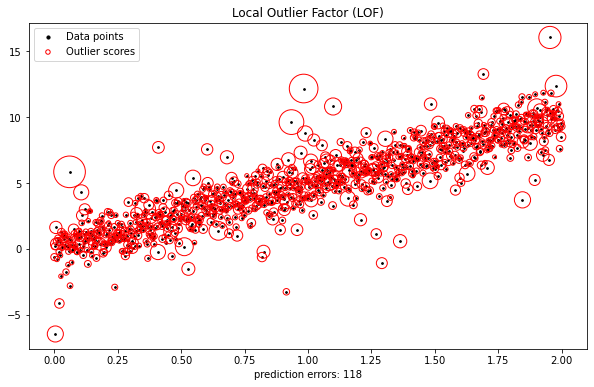

In [425]:
ground_truth=outlier_true_one_1
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_
plt.figure(figsize=(10,6))
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
# plt.xlim((-5, 5))
# plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

### 3. SVM

In [426]:
X = np.array(_df).reshape(-1,2)

In [427]:
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)

In [428]:
clf.fit(X)

OneClassSVM(gamma=0.1, nu=0.1)

In [429]:
y_pred = clf.predict(X)

In [430]:
outlier_OSVM_one = list(clf.predict(X))

In [431]:
conf_matrix = confusion_matrix(outlier_true_one_1, outlier_OSVM_one)

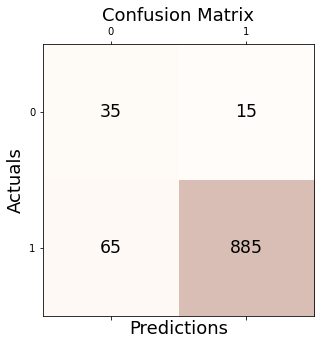

In [432]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [433]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one_1, outlier_OSVM_one))
print('Precision: %.3f' % precision_score(outlier_true_one_1, outlier_OSVM_one))
print('Recall: %.3f' % recall_score(outlier_true_one_1, outlier_OSVM_one))
print('F1 Score: %.3f' % f1_score(outlier_true_one_1, outlier_OSVM_one))

Accuracy: 0.920
Precision: 0.983
Recall: 0.932
F1 Score: 0.957


### 4. ABOD

In [434]:
abod_clf = ABOD(contamination=0.05)
abod_clf.fit(_df[['x', 'y']])

ABOD(contamination=0.05, method='fast', n_neighbors=5)

In [435]:
cblof_clf = CBLOF(contamination=0.05,check_estimator=False, random_state=77)
cblof_clf.fit(_df[['x', 'y']])
_df['ABOD_Clf'] = abod_clf.labels_
_df['CBLOF_Clf'] = cblof_clf.labels_

<AxesSubplot:xlabel='x', ylabel='y'>

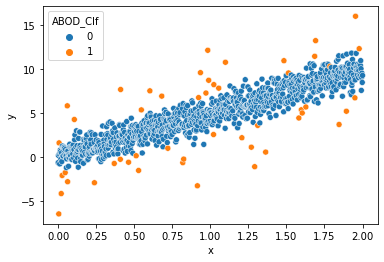

In [436]:
sns.scatterplot(data = _df, x = 'x', y = 'y', hue = 'ABOD_Clf')

In [437]:
outlier_ABOD_one = list(abod_clf.labels_)

In [438]:
outlier_ABOD_one = list(map(lambda x: 1 if x==0  else -1,outlier_ABOD_one))

In [440]:
conf_matrix = confusion_matrix(outlier_true_one_1, outlier_ABOD_one)

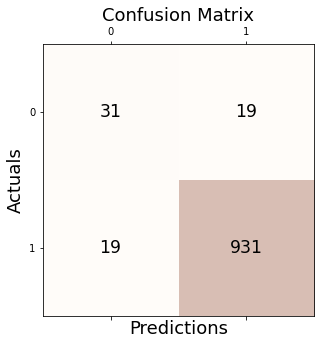

In [441]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [443]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one_1, outlier_ABOD_one))
print('Precision: %.3f' % precision_score(outlier_true_one_1, outlier_ABOD_one))
print('Recall: %.3f' % recall_score(outlier_true_one_1, outlier_ABOD_one))
print('F1 Score: %.3f' % f1_score(outlier_true_one_1, outlier_ABOD_one))

Accuracy: 0.962
Precision: 0.980
Recall: 0.980
F1 Score: 0.980


### 5. IForest

In [444]:
od = IForest(
    threshold=0.,
    n_estimators=100
)

In [445]:
od.fit(_df[['x', 'y']])

In [446]:
preds = od.predict(
    _df[['x', 'y']],
    return_instance_score=True
)

<AxesSubplot:xlabel='x', ylabel='y'>

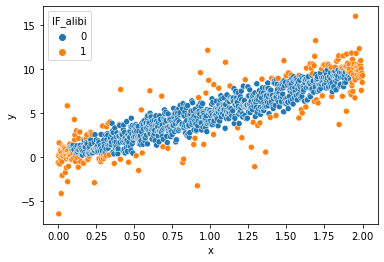

In [447]:
_df['IF_alibi'] = preds['data']['is_outlier']
sns.scatterplot(data = _df, x = 'x', y = 'y', hue = 'IF_alibi')

In [448]:
outlier_alibi_one = _df['IF_alibi']

In [449]:
outlier_alibi_one = list(map(lambda x: 1 if x==0  else -1,outlier_alibi_one))

In [450]:
conf_matrix = confusion_matrix(outlier_true_one_1, outlier_alibi_one)

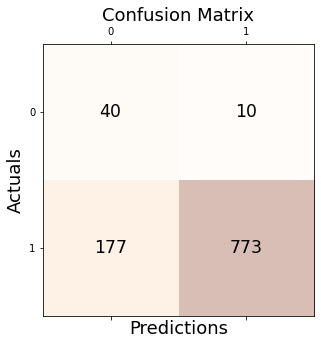

In [451]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [452]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one_1, outlier_alibi_one))
print('Precision: %.3f' % precision_score(outlier_true_one_1, outlier_alibi_one))
print('Recall: %.3f' % recall_score(outlier_true_one_1, outlier_alibi_one))
print('F1 Score: %.3f' % f1_score(outlier_true_one_1, outlier_alibi_one))

Accuracy: 0.813
Precision: 0.987
Recall: 0.814
F1 Score: 0.892


### 6. HBOS

In [487]:
HBOS_clf = HBOS()
HBOS_clf.fit(_df[['x', 'y']])

HBOS(alpha=0.1, contamination=0.1, n_bins=10, tol=0.5)

In [488]:
_df['HBOS_clf'] = HBOS_clf.labels_

<AxesSubplot:xlabel='x', ylabel='y'>

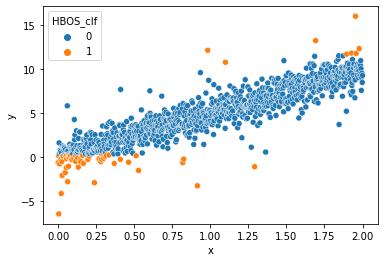

In [489]:
sns.scatterplot(data = _df, x = 'x', y = 'y', hue = 'HBOS_clf')

In [490]:
outlier_HBOS_one = list(HBOS_clf.labels_)

In [491]:
outlier_HBOS_one = list(map(lambda x: 1 if x==0  else -1,outlier_HBOS_one))

In [492]:
conf_matrix = confusion_matrix(outlier_true_one_1, outlier_HBOS_one)

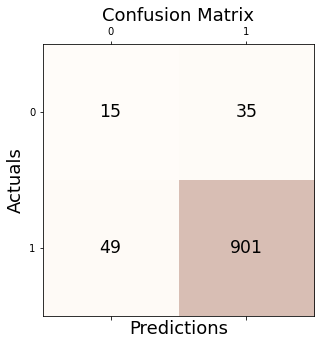

In [493]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [495]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one, outlier_HBOS_one))
print('Precision: %.3f' % precision_score(outlier_true_one, outlier_HBOS_one))
print('Recall: %.3f' % recall_score(outlier_true_one, outlier_HBOS_one))
print('F1 Score: %.3f' % f1_score(outlier_true_one, outlier_HBOS_one))

Accuracy: 0.916
Precision: 0.963
Recall: 0.948
F1 Score: 0.955


### 7. SO_GAAL

In [496]:
SO_GAAL_clf = SO_GAAL()
SO_GAAL_clf.fit(_df[['x', 'y']])

/home/csy/anaconda3/envs/csy/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1 of 60

Testing for epoch 1 index 1:

Testing for epoch 1 index 2:
Epoch 2 of 60

Testing for epoch 2 index 1:

Testing for epoch 2 index 2:
Epoch 3 of 60

Testing for epoch 3 index 1:

Testing for epoch 3 index 2:
Epoch 4 of 60

Testing for epoch 4 index 1:

Testing for epoch 4 index 2:
Epoch 5 of 60

Testing for epoch 5 index 1:

Testing for epoch 5 index 2:
Epoch 6 of 60

Testing for epoch 6 index 1:

Testing for epoch 6 index 2:
Epoch 7 of 60

Testing for epoch 7 index 1:

Testing for epoch 7 index 2:
Epoch 8 of 60

Testing for epoch 8 index 1:

Testing for epoch 8 index 2:
Epoch 9 of 60

Testing for epoch 9 index 1:

Testing for epoch 9 index 2:
Epoch 10 of 60

Testing for epoch 10 index 1:

Testing for epoch 10 index 2:
Epoch 11 of 60

Testing for epoch 11 index 1:

Testing for epoch 11 index 2:
Epoch 12 of 60

Testing for epoch 12 index 1:

Testing for epoch 12 index 2:
Epoch 13 of 60

Testing for epoch 13 index 1:

Testing for epoch 13 index 2:
Epoch 14 of 60

Testing fo

SO_GAAL(contamination=0.1, decay=1e-06, lr_d=0.01, lr_g=0.0001, momentum=0.9,
    stop_epochs=20)

In [497]:
_df['SO_GAAL_clf'] = SO_GAAL_clf.labels_

<AxesSubplot:xlabel='x', ylabel='y'>

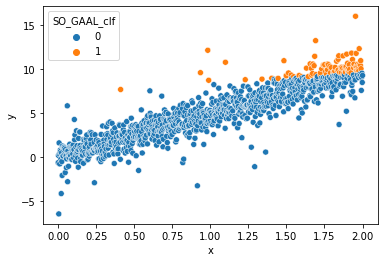

In [498]:
sns.scatterplot(data = _df, x = 'x', y = 'y', hue = 'SO_GAAL_clf')

In [499]:
outlier_SO_GAAL_clf_one = list(SO_GAAL_clf.labels_)

In [500]:
outlier_SO_GAAL_clf_one = list(map(lambda x: 1 if x==0  else -1,outlier_SO_GAAL_clf_one))

In [501]:
conf_matrix = confusion_matrix(outlier_true_one_1, outlier_SO_GAAL_clf_one)

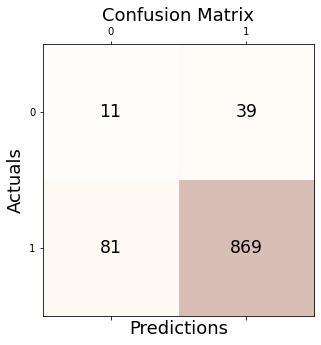

In [502]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [503]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one_1, outlier_SO_GAAL_clf_one))
print('Precision: %.3f' % precision_score(outlier_true_one_1, outlier_SO_GAAL_clf_one))
print('Recall: %.3f' % recall_score(outlier_true_one_1, outlier_SO_GAAL_clf_one))
print('F1 Score: %.3f' % f1_score(outlier_true_one_1, outlier_SO_GAAL_clf_one))

Accuracy: 0.880
Precision: 0.957
Recall: 0.915
F1 Score: 0.935


### 8. MCD

In [504]:
MCD_clf = MCD()
MCD_clf.fit(_df[['x', 'y']])

MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None)

In [505]:
_df['MCD_clf'] = MCD_clf.labels_

<AxesSubplot:xlabel='x', ylabel='y'>

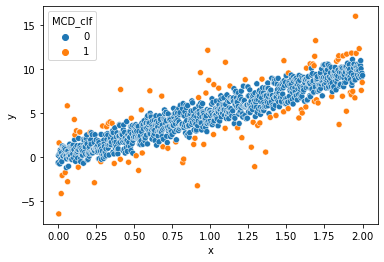

In [506]:
sns.scatterplot(data = _df, x = 'x', y = 'y', hue = 'MCD_clf')

In [507]:
outlier_MCD_one = list(MCD_clf.labels_)

In [508]:
outlier_MCD_one = list(map(lambda x: 1 if x==0  else -1,outlier_MCD_one))

In [509]:
conf_matrix = confusion_matrix(outlier_true_one_1, outlier_MCD_one)

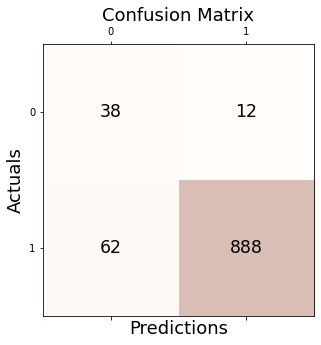

In [510]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [511]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one_1, outlier_MCD_one))
print('Precision: %.3f' % precision_score(outlier_true_one_1, outlier_MCD_one))
print('Recall: %.3f' % recall_score(outlier_true_one_1, outlier_MCD_one))
print('F1 Score: %.3f' % f1_score(outlier_true_one_1, outlier_MCD_one))

Accuracy: 0.926
Precision: 0.987
Recall: 0.935
F1 Score: 0.960


### 9. MO_GAAL

In [512]:
MO_GAAL_clf = MO_GAAL()
MO_GAAL_clf.fit(_df[['x', 'y']])

/home/csy/anaconda3/envs/csy/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1 of 60

Testing for epoch 1 index 1:

Testing for epoch 1 index 2:
Epoch 2 of 60

Testing for epoch 2 index 1:

Testing for epoch 2 index 2:
Epoch 3 of 60

Testing for epoch 3 index 1:

Testing for epoch 3 index 2:
Epoch 4 of 60

Testing for epoch 4 index 1:

Testing for epoch 4 index 2:
Epoch 5 of 60

Testing for epoch 5 index 1:

Testing for epoch 5 index 2:
Epoch 6 of 60

Testing for epoch 6 index 1:

Testing for epoch 6 index 2:
Epoch 7 of 60

Testing for epoch 7 index 1:

Testing for epoch 7 index 2:
Epoch 8 of 60

Testing for epoch 8 index 1:

Testing for epoch 8 index 2:
Epoch 9 of 60

Testing for epoch 9 index 1:

Testing for epoch 9 index 2:
Epoch 10 of 60

Testing for epoch 10 index 1:

Testing for epoch 10 index 2:
Epoch 11 of 60

Testing for epoch 11 index 1:

Testing for epoch 11 index 2:
Epoch 12 of 60

Testing for epoch 12 index 1:

Testing for epoch 12 index 2:
Epoch 13 of 60

Testing for epoch 13 index 1:

Testing for epoch 13 index 2:
Epoch 14 of 60

Testing fo

MO_GAAL(contamination=0.1, decay=1e-06, k=10, lr_d=0.01, lr_g=0.0001,
    momentum=0.9, stop_epochs=20)

In [513]:
_df['MO_GAAL_clf'] = MO_GAAL_clf.labels_

<AxesSubplot:xlabel='x', ylabel='y'>

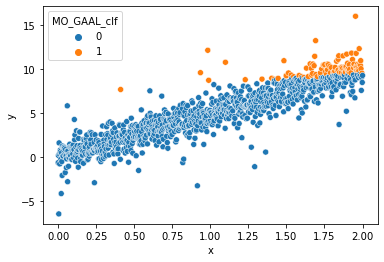

In [514]:
sns.scatterplot(data = _df, x = 'x', y = 'y', hue = 'MO_GAAL_clf')

In [515]:
outlier_MO_GAAL_clf_one = list(MO_GAAL_clf.labels_)

In [516]:
outlier_MO_GAAL_clf_one = list(map(lambda x: 1 if x==0  else -1,outlier_MO_GAAL_clf_one))

In [517]:
conf_matrix = confusion_matrix(outlier_true_one_1, outlier_MO_GAAL_clf_one)

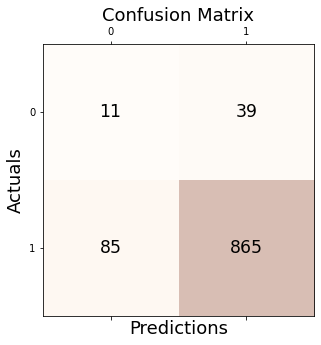

In [518]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [519]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one_1, outlier_MO_GAAL_clf_one))
print('Precision: %.3f' % precision_score(outlier_true_one_1, outlier_MO_GAAL_clf_one))
print('Recall: %.3f' % recall_score(outlier_true_one_1, outlier_MO_GAAL_clf_one))
print('F1 Score: %.3f' % f1_score(outlier_true_one_1, outlier_MO_GAAL_clf_one))

Accuracy: 0.876
Precision: 0.957
Recall: 0.911
F1 Score: 0.933


### 10. LSCP

In [529]:
detectors = [KNN(), LOF(), OCSVM()]

In [530]:
LSCP_clf = LSCP(detectors)

In [531]:
LSCP_clf.fit(_df[['x', 'y']])

/home/csy/anaconda3/envs/csy/lib/python3.8/site-packages/pyod/models/lscp.py:382: UserWarning: The number of histogram bins is greater than the number of classifiers, reducing n_bins to n_clf.
  warnings.warn(


LSCP(contamination=0.1,
   detector_list=[KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0), LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2), OCSVM(cache_size=200, coef0=0.0, contamination=0.1, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
   verbose=False)],
   local_max_features=1.0, local_region_size=30, n_bins=3,
   random_state=RandomState(MT19937) at 0x7F4F53335B40)

In [532]:
_df['LSCP_clf'] = LSCP_clf.labels_

<AxesSubplot:xlabel='x', ylabel='y'>

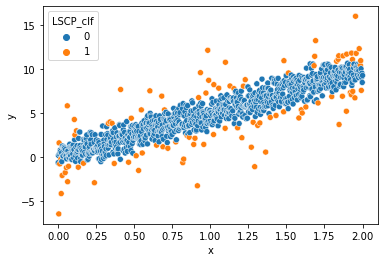

In [533]:
sns.scatterplot(data = _df, x = 'x', y = 'y', hue = 'LSCP_clf')

In [534]:
outlier_LSCP_one = list(LSCP_clf.labels_)

In [535]:
outlier_LSCP_one = list(map(lambda x: 1 if x==0  else -1,outlier_LSCP_one))

In [536]:
conf_matrix = confusion_matrix(outlier_true_one_1, outlier_LSCP_one)

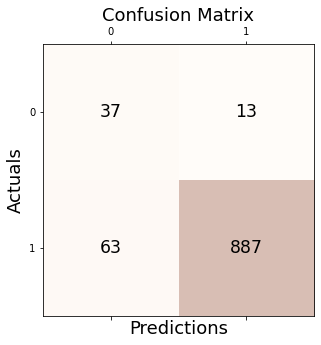

In [537]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [538]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one_1, outlier_LSCP_one))
print('Precision: %.3f' % precision_score(outlier_true_one_1, outlier_LSCP_one))
print('Recall: %.3f' % recall_score(outlier_true_one_1, outlier_LSCP_one))
print('F1 Score: %.3f' % f1_score(outlier_true_one_1, outlier_LSCP_one))

Accuracy: 0.924
Precision: 0.986
Recall: 0.934
F1 Score: 0.959


### 11. Feature Bagging

In [539]:
FeatureBagging_clf = FeatureBagging()
FeatureBagging_clf.fit(_df[['x', 'y']])

FeatureBagging(base_estimator=None, bootstrap_features=False,
        check_detector=True, check_estimator=False, combination='average',
        contamination=0.1, estimator_params={}, max_features=1.0,
        n_estimators=10, n_jobs=1, random_state=None, verbose=0)

In [540]:
_df['FeatureBagging_clf'] = FeatureBagging_clf.labels_

<AxesSubplot:xlabel='x', ylabel='y'>

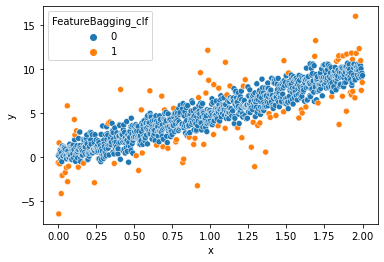

In [541]:
sns.scatterplot(data = _df, x = 'x', y = 'y', hue = 'FeatureBagging_clf')

In [542]:
outlier_FeatureBagging_one = list(FeatureBagging_clf.labels_)

In [543]:
outlier_FeatureBagging_one = list(map(lambda x: 1 if x==0  else -1,outlier_FeatureBagging_one))

In [544]:
conf_matrix = confusion_matrix(outlier_true_one_1, outlier_FeatureBagging_one)

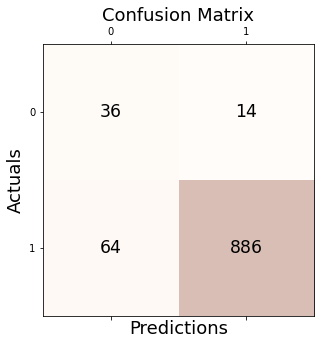

In [545]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [546]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one_1, outlier_FeatureBagging_one))
print('Precision: %.3f' % precision_score(outlier_true_one_1, outlier_FeatureBagging_one))
print('Recall: %.3f' % recall_score(outlier_true_one_1, outlier_FeatureBagging_one))
print('F1 Score: %.3f' % f1_score(outlier_true_one_1, outlier_FeatureBagging_one))

Accuracy: 0.922
Precision: 0.984
Recall: 0.933
F1 Score: 0.958


## Orbit

In [547]:
np.random.seed(777)
pi=np.pi
n=1000
ang=np.linspace(-pi,pi-2*pi/n,n)
r=5+np.cos(np.linspace(0,12*pi,n))
vx=r*np.cos(ang)
vy=r*np.sin(ang)
f1=10*np.sin(np.linspace(0,6*pi,n))
f = f1 + x

In [548]:
_df = pd.DataFrame({'x' : vx, 'y' : vy, 'f' : f})

### 1. Proposed Method

In [549]:
X = np.array(_df)

In [550]:
class SIMUL:
    def __init__(self,df):
        self.df = df 
        self.f = df.f.to_numpy()
        self.x = df.x.to_numpy()
        self.y = df.y.to_numpy()
        self.n = len(self.f)
        self.theta= None
    def get_distance(self):
        self.D = np.zeros([self.n,self.n])
        locations = np.stack([self.x, self.y],axis=1)
        for i in tqdm.tqdm(range(self.n)):
            for j in range(i,self.n):
                self.D[i,j]=np.linalg.norm(locations[i]-locations[j])
        self.D = self.D + self.D.T
    def get_weightmatrix(self,theta=1,beta=0.5,kappa=4000):
        self.theta = theta
        dist = np.where(self.D < kappa,self.D,0)
        self.W = np.exp(-(dist/self.theta)**2)
    def _eigen(self):
        d= self.W.sum(axis=1)
        D= np.diag(d)
        self.L = np.diag(1/np.sqrt(d)) @ (D-self.W) @ np.diag(1/np.sqrt(d))
        self.lamb, self.Psi = np.linalg.eigh(self.L)
        self.Lamb = np.diag(self.lamb)       
    def fit(self,sd=5,ref=20): # fit with ebayesthresh
        self._eigen()
        self.fbar = self.Psi.T @ self.f # fbar := graph fourier transform of f
        self.power = self.fbar**2 
        ebayesthresh = importr('EbayesThresh').ebayesthresh
        self.power_threshed=np.array(ebayesthresh(FloatVector(self.fbar**2),sd=sd))
        self.fbar_threshed = np.where(self.power_threshed>0,self.fbar,0)
        self.fhat = self.Psi@self.fbar_threshed
        self.df = self.df.assign(fHat = self.fhat)
        self.df = self.df.assign(Residual = self.df.f- self.df.fHat)
        self.bottom = np.zeros_like(self.f)
        self.width=0.05
        self.depth=0.05

In [551]:
_simul = SIMUL(_df)

In [552]:
_simul.get_distance()

100%|██████████| 1000/1000 [00:01<00:00, 529.85it/s]


In [553]:
_simul.get_weightmatrix(theta=(_simul.D[_simul.D>0].mean()),kappa=2500) 

In [554]:
_simul.fit(sd=15,ref=20)

In [555]:
outlier_simul_first_index = np.array(_simul.df.query('Residual**2>20').reset_index()['index'])

In [556]:
outlier_simul_first_value = np.array(_simul.df.query('Residual**2>20').reset_index()['y'])

In [557]:
outlier_simul_one = (_simul.df['Residual']**2).tolist()

In [558]:
outlier_simul_one = list(map(lambda x: -1 if x > 20 else 1,outlier_simul_one))

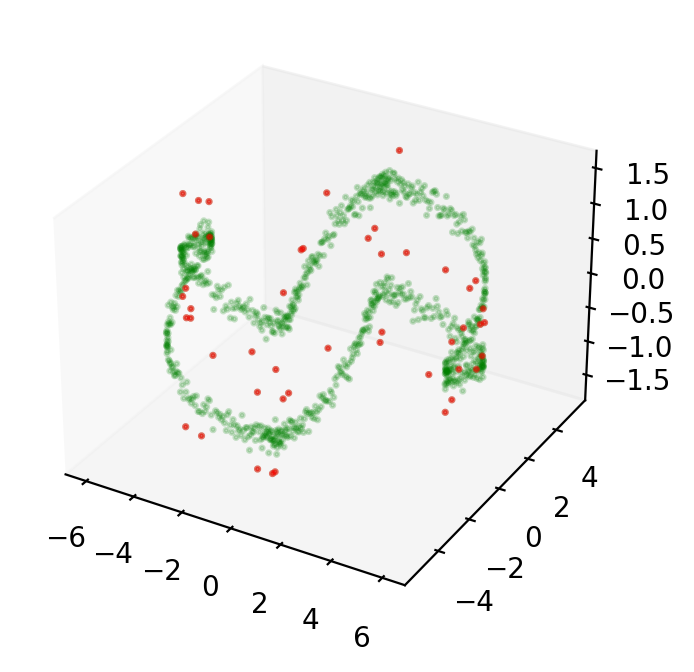

In [559]:
p=plt.figure(figsize=(12,4), dpi=200)  # Make figure object 
ax=p.add_subplot(1,1,1, projection='3d')
ax.grid(False)
ax.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
ax.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
ax.ticklabel_format(style='sci', axis='z',scilimits=(0,0))
top = f
bottom = np.zeros_like(top)
width=depth=0.05
ax.scatter3D(vx,vy,f,zdir='z',s=10,marker='.',c='green',alpha=0.2)
ax.scatter3D(_simul.df.loc[outlier_simul_first_index]['x'],_simul.df.loc[outlier_simul_first_index]['y'],_simul.df.loc[outlier_simul_first_index]['f'], zdir='z',s=10,marker='.',c='red',alpha=0.5)
# ax.bar3d(vx, vy, bottom, width, depth, 0, color='Black',shade=False)

In [560]:
conf_matrix = confusion_matrix(outlier_true_one, outlier_simul_one)

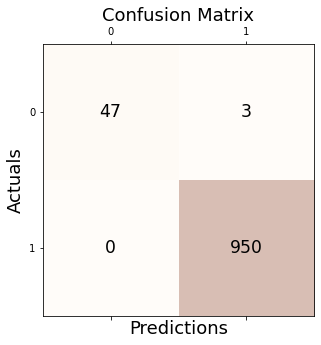

In [561]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [562]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one, outlier_simul_one))
print('Precision: %.3f' % precision_score(outlier_true_one, outlier_simul_one))
print('Recall: %.3f' % recall_score(outlier_true_one, outlier_simul_one))
print('F1 Score: %.3f' % f1_score(outlier_true_one, outlier_simul_one))

Accuracy: 0.997
Precision: 0.997
Recall: 1.000
F1 Score: 0.998


### 2. LOF

In [563]:
clf = LocalOutlierFactor(n_neighbors=2)

<Figure size 720x432 with 0 Axes>

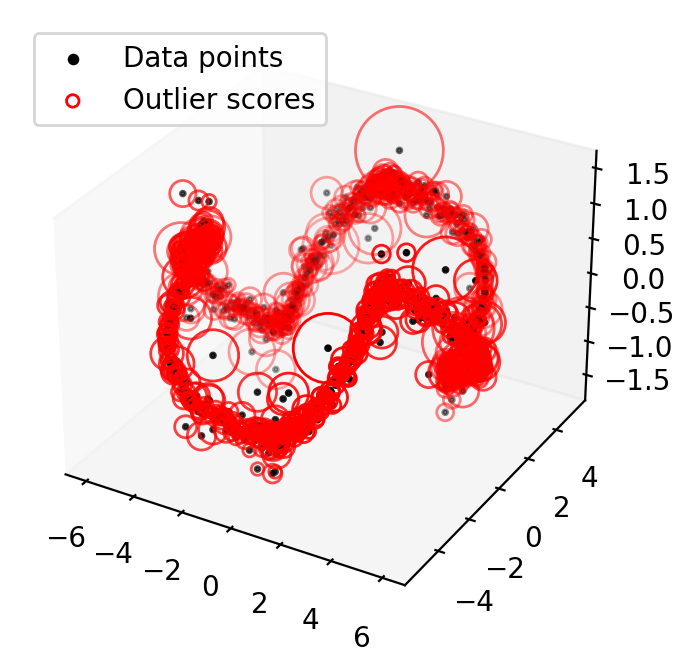

In [564]:
ground_truth=outlier_true_one
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_
plt.figure(figsize=(10,6))
p=plt.figure(figsize=(12,4), dpi=200)  # Make figure object 
ax=p.add_subplot(1,1,1, projection='3d')
ax.grid(False)
ax.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
ax.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
ax.ticklabel_format(style='sci', axis='z',scilimits=(0,0))
# ax.title("Local Outlier Factor (LOF)")
ax.scatter3D(X[:, 0], X[:, 1],X[:, 2], color="k", s=3.0, label="Data points")
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
ax.scatter3D(
    X[:, 0],
    X[:, 1],
    X[:, 2],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
ax.axis("tight")
# plt.xlim((-5, 5))
# plt.ylim((-5, 5))
# ax.xlabel("prediction errors: %d" % (n_errors))
legend = ax.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
# ax.show()

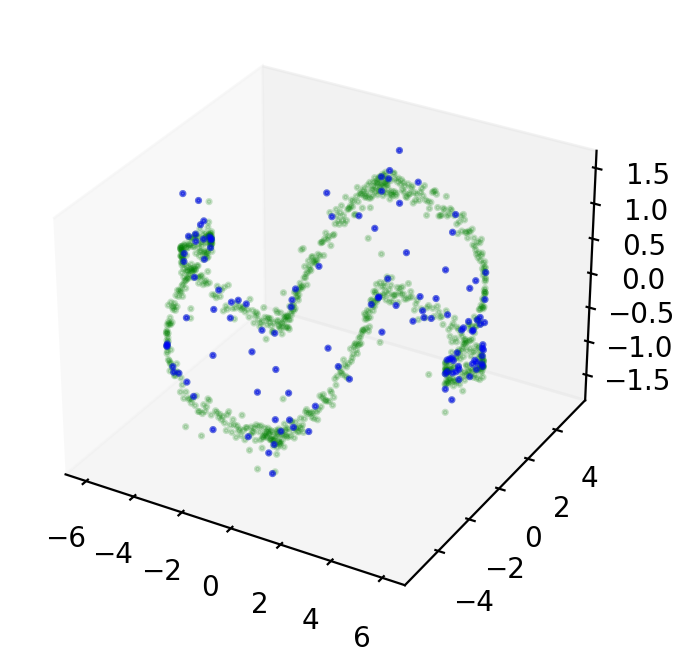

In [565]:
p=plt.figure(figsize=(12,4), dpi=200)  # Make figure object 
ax=p.add_subplot(1,1,1, projection='3d')
ax.grid(False)
ax.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
ax.ticklabel_format(style='sci', axis='y',scilimits=(0,0))
ax.ticklabel_format(style='sci', axis='z',scilimits=(0,0))
top = f
bottom = np.zeros_like(top)
width=depth=0.05
ax.scatter3D(vx,vy,f,zdir='z',s=10,marker='.',c='green',alpha=0.2)
ax.scatter3D(_df.loc[outlier_first_index]['x'],_df.loc[outlier_first_index]['y'],_df.loc[outlier_first_index]['f'], zdir='z',s=10,marker='.',c='blue',alpha=0.5)
# ax.bar3d(vx, vy, bottom, width, depth, 0, color='Black',shade=False)

outlier

In [566]:
outlier_first_index = np.where(clf.fit_predict(X)==-1)

In [567]:
outlier_first_value = clf.fit_predict(X)[clf.fit_predict(X)==-1]

In [568]:
conf_matrix = confusion_matrix(outlier_true_one, clf.fit_predict(X))

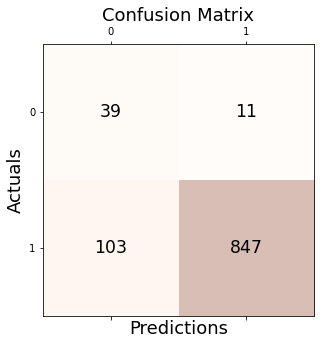

In [569]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [570]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one, clf.fit_predict(X)))
print('Precision: %.3f' % precision_score(outlier_true_one, clf.fit_predict(X)))
print('Recall: %.3f' % recall_score(outlier_true_one, clf.fit_predict(X)))
print('F1 Score: %.3f' % f1_score(outlier_true_one, clf.fit_predict(X)))

Accuracy: 0.886
Precision: 0.987
Recall: 0.892
F1 Score: 0.937


### 3. SVM

In [571]:
X = np.array(_df).reshape(-1,3)

In [572]:
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)

In [573]:
clf.fit(X)

OneClassSVM(gamma=0.1, nu=0.1)

In [574]:
y_pred = clf.predict(X)

In [575]:
outlier_OSVM_one = list(clf.predict(X))

In [576]:
conf_matrix = confusion_matrix(outlier_true_one, outlier_OSVM_one)

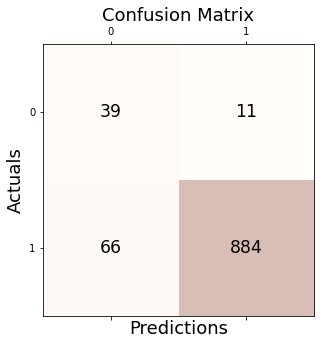

In [577]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [578]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one, outlier_OSVM_one))
print('Precision: %.3f' % precision_score(outlier_true_one, outlier_OSVM_one))
print('Recall: %.3f' % recall_score(outlier_true_one, outlier_OSVM_one))
print('F1 Score: %.3f' % f1_score(outlier_true_one, outlier_OSVM_one))

Accuracy: 0.923
Precision: 0.988
Recall: 0.931
F1 Score: 0.958


### 4. ABOD

In [579]:
abod_clf = ABOD(contamination=0.05)
abod_clf.fit(_df[['x', 'y','f']])

ABOD(contamination=0.05, method='fast', n_neighbors=5)

In [580]:
cblof_clf = CBLOF(contamination=0.05,check_estimator=False, random_state=77)
cblof_clf.fit(_df[['x', 'y', 'f']])
_df['ABOD_Clf'] = abod_clf.labels_
_df['CBLOF_Clf'] = cblof_clf.labels_

In [581]:
outlier_ABOD_one = list(abod_clf.labels_)

In [582]:
outlier_ABOD_one = list(map(lambda x: 1 if x==0  else -1,outlier_ABOD_one))

In [583]:
conf_matrix = confusion_matrix(outlier_true_one, outlier_ABOD_one)

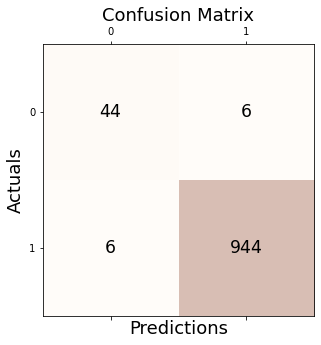

In [584]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [585]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one, outlier_ABOD_one))
print('Precision: %.3f' % precision_score(outlier_true_one, outlier_ABOD_one))
print('Recall: %.3f' % recall_score(outlier_true_one, outlier_ABOD_one))
print('F1 Score: %.3f' % f1_score(outlier_true_one, outlier_ABOD_one))

Accuracy: 0.988
Precision: 0.994
Recall: 0.994
F1 Score: 0.994


### 5. IForest

In [586]:
od.fit(_df[['x', 'y','f']])

In [587]:
preds = od.predict(
    _df[['x', 'y','f']],
    return_instance_score=True
)

<AxesSubplot:xlabel='x', ylabel='y'>

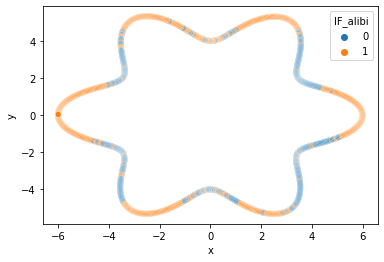

In [588]:
_df['IF_alibi'] = preds['data']['is_outlier']
sns.scatterplot(data = _df, x = 'x', y = 'y', hue = 'IF_alibi')

In [589]:
outlier_alibi_one = _df['IF_alibi']

In [590]:
outlier_alibi_one = list(map(lambda x: 1 if x==0  else -1,outlier_alibi_one))

In [591]:
conf_matrix = confusion_matrix(outlier_true_one, outlier_alibi_one)

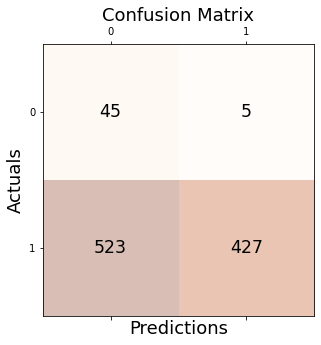

In [592]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [593]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one, outlier_alibi_one))
print('Precision: %.3f' % precision_score(outlier_true_one, outlier_alibi_one))
print('Recall: %.3f' % recall_score(outlier_true_one, outlier_alibi_one))
print('F1 Score: %.3f' % f1_score(outlier_true_one, outlier_alibi_one))

Accuracy: 0.472
Precision: 0.988
Recall: 0.449
F1 Score: 0.618


### 6. HBOS

In [594]:
HBOS_clf = HBOS()
HBOS_clf.fit(_df[['x', 'y','f']])

HBOS(alpha=0.1, contamination=0.1, n_bins=10, tol=0.5)

In [595]:
_df['HBOS_clf'] = HBOS_clf.labels_

<AxesSubplot:xlabel='x', ylabel='y'>

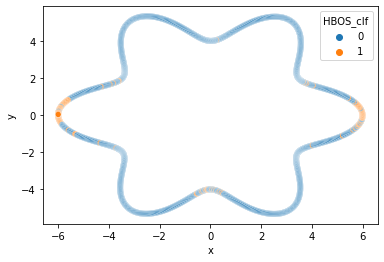

In [596]:
sns.scatterplot(data = _df, x = 'x', y = 'y', hue = 'HBOS_clf')

In [597]:
outlier_HBOS_one = list(HBOS_clf.labels_)

In [598]:
outlier_HBOS_one = list(map(lambda x: 1 if x==0  else -1,outlier_HBOS_one))

In [599]:
conf_matrix = confusion_matrix(outlier_true_one, outlier_HBOS_one)

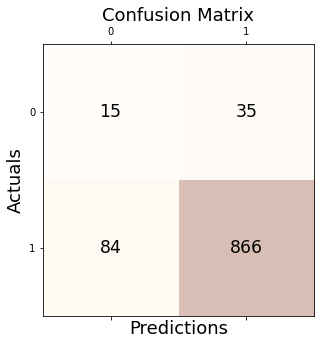

In [600]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [601]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one, outlier_HBOS_one))
print('Precision: %.3f' % precision_score(outlier_true_one, outlier_HBOS_one))
print('Recall: %.3f' % recall_score(outlier_true_one, outlier_HBOS_one))
print('F1 Score: %.3f' % f1_score(outlier_true_one, outlier_HBOS_one))

Accuracy: 0.881
Precision: 0.961
Recall: 0.912
F1 Score: 0.936


### 7. SO_GAAL

In [602]:
SO_GAAL_clf = SO_GAAL()
SO_GAAL_clf.fit(_df[['x', 'y','f']])

/home/csy/anaconda3/envs/csy/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1 of 60

Testing for epoch 1 index 1:

Testing for epoch 1 index 2:
Epoch 2 of 60

Testing for epoch 2 index 1:

Testing for epoch 2 index 2:
Epoch 3 of 60

Testing for epoch 3 index 1:

Testing for epoch 3 index 2:
Epoch 4 of 60

Testing for epoch 4 index 1:

Testing for epoch 4 index 2:
Epoch 5 of 60

Testing for epoch 5 index 1:

Testing for epoch 5 index 2:
Epoch 6 of 60

Testing for epoch 6 index 1:

Testing for epoch 6 index 2:
Epoch 7 of 60

Testing for epoch 7 index 1:

Testing for epoch 7 index 2:
Epoch 8 of 60

Testing for epoch 8 index 1:

Testing for epoch 8 index 2:
Epoch 9 of 60

Testing for epoch 9 index 1:

Testing for epoch 9 index 2:
Epoch 10 of 60

Testing for epoch 10 index 1:

Testing for epoch 10 index 2:
Epoch 11 of 60

Testing for epoch 11 index 1:

Testing for epoch 11 index 2:
Epoch 12 of 60

Testing for epoch 12 index 1:

Testing for epoch 12 index 2:
Epoch 13 of 60

Testing for epoch 13 index 1:

Testing for epoch 13 index 2:
Epoch 14 of 60

Testing fo

SO_GAAL(contamination=0.1, decay=1e-06, lr_d=0.01, lr_g=0.0001, momentum=0.9,
    stop_epochs=20)

In [603]:
_df['SO_GAAL_clf'] = SO_GAAL_clf.labels_

<AxesSubplot:xlabel='x', ylabel='y'>

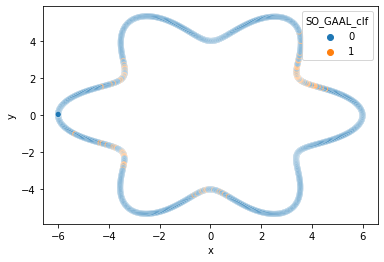

In [604]:
sns.scatterplot(data = _df, x = 'x', y = 'y', hue = 'SO_GAAL_clf')

In [605]:
outlier_SO_GAAL_clf_one = list(SO_GAAL_clf.labels_)

In [606]:
outlier_SO_GAAL_clf_one = list(map(lambda x: 1 if x==0  else -1,outlier_SO_GAAL_clf_one))

In [607]:
conf_matrix = confusion_matrix(outlier_true_one, outlier_SO_GAAL_clf_one)

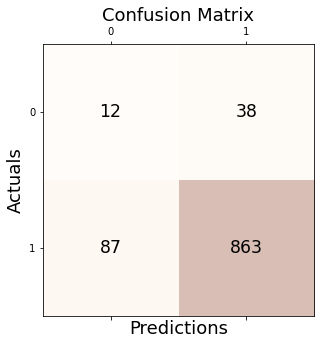

In [608]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [609]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one, outlier_SO_GAAL_clf_one))
print('Precision: %.3f' % precision_score(outlier_true_one, outlier_SO_GAAL_clf_one))
print('Recall: %.3f' % recall_score(outlier_true_one, outlier_SO_GAAL_clf_one))
print('F1 Score: %.3f' % f1_score(outlier_true_one, outlier_SO_GAAL_clf_one))

Accuracy: 0.875
Precision: 0.958
Recall: 0.908
F1 Score: 0.932


### 8. MCD

In [620]:
MCD_clf = MCD()
MCD_clf.fit(_df[['x', 'y','f']])

MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None)

In [621]:
_df['MCD_clf'] = MCD_clf.labels_

<AxesSubplot:xlabel='x', ylabel='y'>

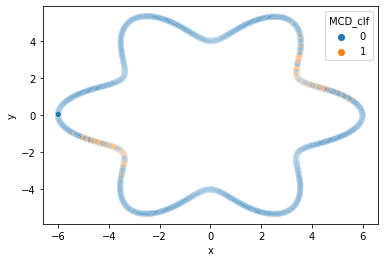

In [622]:
sns.scatterplot(data = _df, x = 'x', y = 'y', hue = 'MCD_clf')

In [623]:
outlier_MCD_one = list(MCD_clf.labels_)

In [624]:
outlier_MCD_one = list(map(lambda x: 1 if x==0  else -1,outlier_MCD_one))

In [625]:
conf_matrix = confusion_matrix(outlier_true_one, outlier_MCD_one)

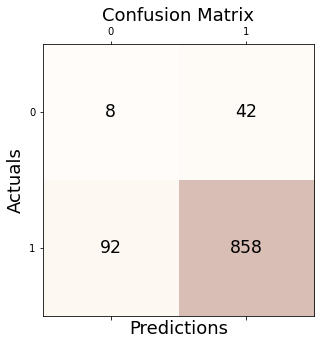

In [626]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [627]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one, outlier_MCD_one))
print('Precision: %.3f' % precision_score(outlier_true_one, outlier_MCD_one))
print('Recall: %.3f' % recall_score(outlier_true_one, outlier_MCD_one))
print('F1 Score: %.3f' % f1_score(outlier_true_one, outlier_MCD_one))

Accuracy: 0.866
Precision: 0.953
Recall: 0.903
F1 Score: 0.928


### 9. MO_GAAL

In [628]:
MO_GAAL_clf = MO_GAAL()
MO_GAAL_clf.fit(_df[['x', 'y','f']])

/home/csy/anaconda3/envs/csy/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1 of 60

Testing for epoch 1 index 1:

Testing for epoch 1 index 2:
Epoch 2 of 60

Testing for epoch 2 index 1:

Testing for epoch 2 index 2:
Epoch 3 of 60

Testing for epoch 3 index 1:

Testing for epoch 3 index 2:
Epoch 4 of 60

Testing for epoch 4 index 1:

Testing for epoch 4 index 2:
Epoch 5 of 60

Testing for epoch 5 index 1:

Testing for epoch 5 index 2:
Epoch 6 of 60

Testing for epoch 6 index 1:

Testing for epoch 6 index 2:
Epoch 7 of 60

Testing for epoch 7 index 1:

Testing for epoch 7 index 2:
Epoch 8 of 60

Testing for epoch 8 index 1:

Testing for epoch 8 index 2:
Epoch 9 of 60

Testing for epoch 9 index 1:

Testing for epoch 9 index 2:
Epoch 10 of 60

Testing for epoch 10 index 1:

Testing for epoch 10 index 2:
Epoch 11 of 60

Testing for epoch 11 index 1:

Testing for epoch 11 index 2:
Epoch 12 of 60

Testing for epoch 12 index 1:

Testing for epoch 12 index 2:
Epoch 13 of 60

Testing for epoch 13 index 1:

Testing for epoch 13 index 2:
Epoch 14 of 60

Testing fo

MO_GAAL(contamination=0.1, decay=1e-06, k=10, lr_d=0.01, lr_g=0.0001,
    momentum=0.9, stop_epochs=20)

In [629]:
_df['MO_GAAL_clf'] = MO_GAAL_clf.labels_

<AxesSubplot:xlabel='x', ylabel='y'>

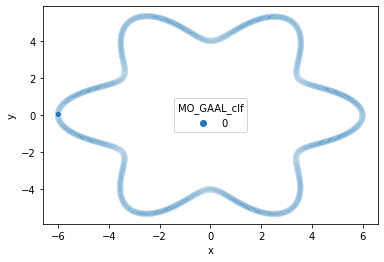

In [630]:
sns.scatterplot(data = _df, x = 'x', y = 'y', hue = 'MO_GAAL_clf')

In [631]:
outlier_MO_GAAL_clf_one = list(MO_GAAL_clf.labels_)

In [632]:
outlier_MO_GAAL_clf_one = list(map(lambda x: 1 if x==0  else -1,outlier_MO_GAAL_clf_one))

In [633]:
conf_matrix = confusion_matrix(outlier_true_one, outlier_MO_GAAL_clf_one)

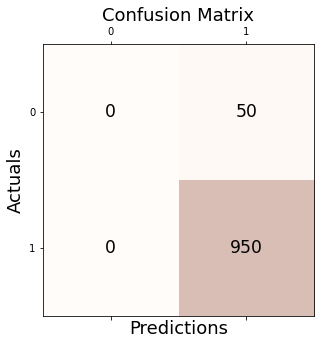

In [634]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [635]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one, outlier_MO_GAAL_clf_one))
print('Precision: %.3f' % precision_score(outlier_true_one, outlier_MO_GAAL_clf_one))
print('Recall: %.3f' % recall_score(outlier_true_one, outlier_MO_GAAL_clf_one))
print('F1 Score: %.3f' % f1_score(outlier_true_one, outlier_MO_GAAL_clf_one))

Accuracy: 0.950
Precision: 0.950
Recall: 1.000
F1 Score: 0.974


### 10. LSCP

In [636]:
detectors = [KNN(), LOF(), OCSVM()]

In [637]:
LSCP_clf = LSCP(detectors)

In [638]:
LSCP_clf.fit(_df[['x', 'y','f']])

/home/csy/anaconda3/envs/csy/lib/python3.8/site-packages/pyod/models/lscp.py:382: UserWarning: The number of histogram bins is greater than the number of classifiers, reducing n_bins to n_clf.
  warnings.warn(


LSCP(contamination=0.1,
   detector_list=[KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0), LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2), OCSVM(cache_size=200, coef0=0.0, contamination=0.1, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
   verbose=False)],
   local_max_features=1.0, local_region_size=30, n_bins=3,
   random_state=RandomState(MT19937) at 0x7F4F53335B40)

In [639]:
_df['LSCP_clf'] = LSCP_clf.labels_

<AxesSubplot:xlabel='x', ylabel='y'>

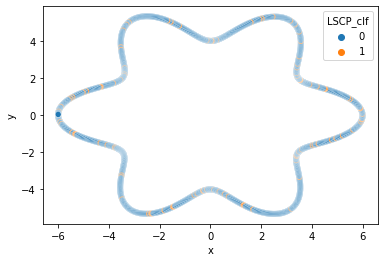

In [640]:
sns.scatterplot(data = _df, x = 'x', y = 'y', hue = 'LSCP_clf')

In [641]:
outlier_LSCP_one = list(LSCP_clf.labels_)

In [642]:
outlier_LSCP_one = list(map(lambda x: 1 if x==0  else -1,outlier_LSCP_one))

In [643]:
conf_matrix = confusion_matrix(outlier_true_one, outlier_LSCP_one)

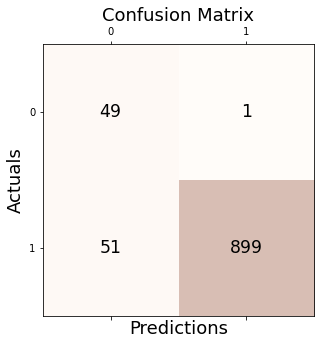

In [644]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [645]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one, outlier_LSCP_one))
print('Precision: %.3f' % precision_score(outlier_true_one, outlier_LSCP_one))
print('Recall: %.3f' % recall_score(outlier_true_one, outlier_LSCP_one))
print('F1 Score: %.3f' % f1_score(outlier_true_one, outlier_LSCP_one))

Accuracy: 0.948
Precision: 0.999
Recall: 0.946
F1 Score: 0.972


### 11. Feature Bagging

In [646]:
FeatureBagging_clf = FeatureBagging()
FeatureBagging_clf.fit(_df[['x', 'y','f']])

FeatureBagging(base_estimator=None, bootstrap_features=False,
        check_detector=True, check_estimator=False, combination='average',
        contamination=0.1, estimator_params={}, max_features=1.0,
        n_estimators=10, n_jobs=1, random_state=None, verbose=0)

In [647]:
_df['FeatureBagging_clf'] = FeatureBagging_clf.labels_

<AxesSubplot:xlabel='x', ylabel='y'>

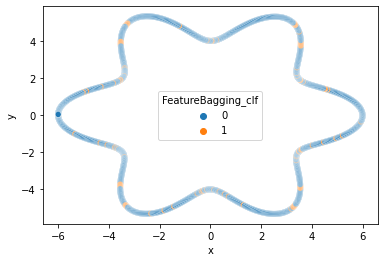

In [648]:
sns.scatterplot(data = _df, x = 'x', y = 'y', hue = 'FeatureBagging_clf')

In [649]:
outlier_FeatureBagging_one = list(FeatureBagging_clf.labels_)

In [650]:
outlier_FeatureBagging_one = list(map(lambda x: 1 if x==0  else -1,outlier_FeatureBagging_one))

In [651]:
conf_matrix = confusion_matrix(outlier_true_one, outlier_FeatureBagging_one)

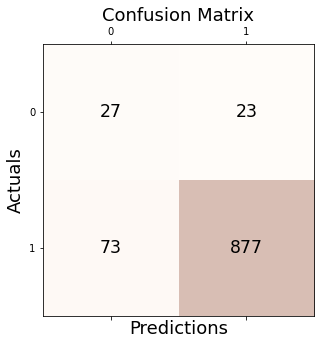

In [652]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [653]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one, outlier_FeatureBagging_one))
print('Precision: %.3f' % precision_score(outlier_true_one, outlier_FeatureBagging_one))
print('Recall: %.3f' % recall_score(outlier_true_one, outlier_FeatureBagging_one))
print('F1 Score: %.3f' % f1_score(outlier_true_one, outlier_FeatureBagging_one))

Accuracy: 0.904
Precision: 0.974
Recall: 0.923
F1 Score: 0.948


## Bunny

In [214]:
G = graphs.Bunny()
n = G.N

In [215]:
g = filters.Heat(G, tau=75) 

In [216]:
normal = np.random.randn(n)
unif = np.concatenate([np.random.uniform(low=3,high=7,size=60), np.random.uniform(low=-7,high=-3,size=60),np.zeros(n-120)]); np.random.shuffle(unif)
noise = normal + unif
index_of_trueoutlier2 = np.where(unif!=0)

In [217]:
f = np.zeros(n)
f[1000] = -3234
f = g.filter(f, method='chebyshev') 

2022-11-19 09:12:09,381:[WARNING](pygsp.graphs.graph.lmax): The largest eigenvalue G.lmax is not available, we need to estimate it. Explicitly call G.estimate_lmax() or G.compute_fourier_basis() once beforehand to suppress the warning.


In [218]:
_W = G.W.toarray()
_x = G.coords[:,0]
_y = G.coords[:,1]
_z = -G.coords[:,2]

In [219]:
_df = pd.DataFrame({'x' : _x, 'y' : _y, 'z' : _z, 'fnoise':f+noise,'f' : f, 'noise': noise})

In [220]:
outlier_true_index_2 = np.where(unif!=0)

In [221]:
outlier_true_value_2 = unif[unif!=0]

In [222]:
outlier_true_one_2 = unif.copy()

In [223]:
outlier_true_one_2 = list(map(lambda x: -1 if x !=0  else 1,outlier_true_one_2))

### 1. Proposed Method

In [224]:
class SIMUL:
    def __init__(self,df):
        self.df = df 
        self.f = df.f.to_numpy()
        self.z = df.z.to_numpy()
        self.x = df.x.to_numpy()
        self.y = df.y.to_numpy()
        self.noise = df.noise.to_numpy()
        self.fnoise = self.f + self.noise
        self.W = _W
        self.n = len(self.f)
        self.theta= None
    def _eigen(self):
        d= self.W.sum(axis=1)
        D= np.diag(d)
        self.L = np.diag(1/np.sqrt(d)) @ (D-self.W) @ np.diag(1/np.sqrt(d))
        self.lamb, self.Psi = np.linalg.eigh(self.L)
        self.Lamb = np.diag(self.lamb)       
    def fit(self,sd=5,ref=6): # fit with ebayesthresh
        self._eigen()
        self.fbar = self.Psi.T @ self.fnoise # fbar := graph fourier transform of f
        self.power = self.fbar**2 
        ebayesthresh = importr('EbayesThresh').ebayesthresh
        self.power_threshed=np.array(ebayesthresh(FloatVector(self.fbar**2),sd=sd))
        self.fbar_threshed = np.where(self.power_threshed>0,self.fbar,0)
        self.fhat = self.Psi@self.fbar_threshed
        self.df = self.df.assign(fnoise = self.fnoise)
        self.df = self.df.assign(fHat = self.fhat)
        self.df = self.df.assign(Residual = self.df.f + self.df.noise - self.df.fHat)
        self.bottom = np.zeros_like(self.f)
        self.width=0.05
        self.depth=0.05

In [225]:
_simul = SIMUL(_df)

In [226]:
_simul.fit(sd=20,ref=10)

In [227]:
outlier_simul_first_index = np.array(_simul.df.query('Residual**2>10').reset_index()['index'])

In [228]:
outlier_simul_first_value = np.array(_simul.df.query('Residual**2>10').reset_index()['y'])

In [229]:
outlier_simul_one = (_simul.df['Residual']**2).tolist()

In [230]:
outlier_simul_one = list(map(lambda x: -1 if x > 10 else 1,outlier_simul_one))

In [231]:
conf_matrix = confusion_matrix(outlier_true_one_2, outlier_simul_one)

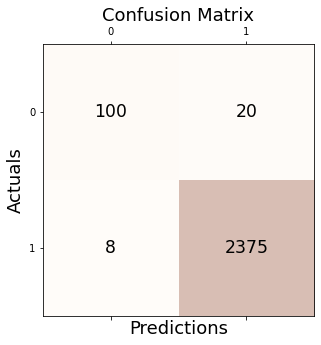

In [232]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [233]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one_2, outlier_simul_one))
print('Precision: %.3f' % precision_score(outlier_true_one_2, outlier_simul_one))
print('Recall: %.3f' % recall_score(outlier_true_one_2, outlier_simul_one))
print('F1 Score: %.3f' % f1_score(outlier_true_one_2, outlier_simul_one))

Accuracy: 0.989
Precision: 0.992
Recall: 0.997
F1 Score: 0.994


### 2. LOF

In [234]:
X = np.array(_df)

In [235]:
clf = LocalOutlierFactor(n_neighbors=2)

In [236]:
clf.fit_predict(X[:,:4])

array([1, 1, 1, ..., 1, 1, 1])

outlier

In [237]:
outlier_first_index = np.where(clf.fit_predict(X[:,:4])==-1)

In [238]:
outlier_first_value = clf.fit_predict(X)[clf.fit_predict(X[:,:4])==-1]

In [239]:
conf_matrix = confusion_matrix(outlier_true_one_2, clf.fit_predict(X[:,:4]))

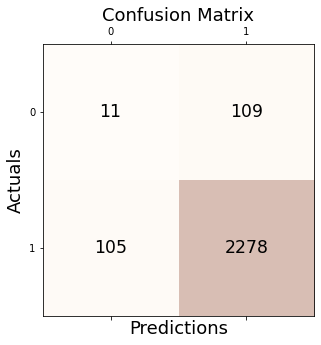

In [240]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [241]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one_2, clf.fit_predict(X[:,:4])))
print('Precision: %.3f' % precision_score(outlier_true_one_2, clf.fit_predict(X[:,:4])))
print('Recall: %.3f' % recall_score(outlier_true_one_2, clf.fit_predict(X[:,:4])))
print('F1 Score: %.3f' % f1_score(outlier_true_one_2, clf.fit_predict(X[:,:4])))

Accuracy: 0.915
Precision: 0.954
Recall: 0.956
F1 Score: 0.955


### 3. SVM

In [242]:
_df = pd.DataFrame({'x' : _x, 'y' : _y, 'z' : _z, 'fnoise':f+noise})

In [243]:
_df = np.array(_df).reshape(-1,4)

In [244]:
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)

In [245]:
clf.fit(_df)

OneClassSVM(gamma=0.1, nu=0.1)

In [246]:
y_pred = clf.predict(_df)

In [247]:
outlier_OSVM_one = list(clf.predict(_df))

In [248]:
conf_matrix = confusion_matrix(outlier_true_one_2, outlier_OSVM_one)

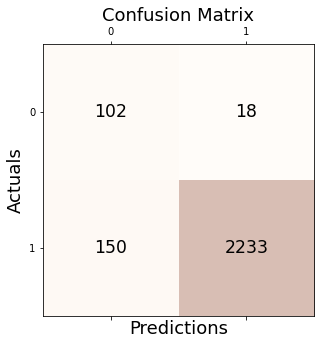

In [249]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [250]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one_2, outlier_OSVM_one))
print('Precision: %.3f' % precision_score(outlier_true_one_2, outlier_OSVM_one))
print('Recall: %.3f' % recall_score(outlier_true_one_2, outlier_OSVM_one))
print('F1 Score: %.3f' % f1_score(outlier_true_one_2, outlier_OSVM_one))

Accuracy: 0.933
Precision: 0.992
Recall: 0.937
F1 Score: 0.964


### 4. ABOD

In [251]:
_df = pd.DataFrame({'x' : _x, 'y' : _y, 'z' : _z, 'fnoise':f+noise,'f' : f, 'noise': noise})

In [252]:
od.fit(_df[['x', 'y','z','fnoise']])

In [253]:
preds = od.predict(
    _df[['x', 'y','z','fnoise']],
    return_instance_score=True
)

<AxesSubplot:xlabel='x', ylabel='y'>

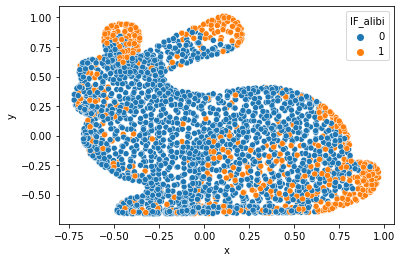

In [254]:
_df['IF_alibi'] = preds['data']['is_outlier']
sns.scatterplot(data = _df, x = 'x', y = 'y', hue = 'IF_alibi')

In [255]:
outlier_alibi_one = _df['IF_alibi']

In [256]:
outlier_alibi_one = list(map(lambda x: 1 if x==0  else -1,outlier_alibi_one))

In [257]:
conf_matrix = confusion_matrix(outlier_true_one_2, outlier_alibi_one)

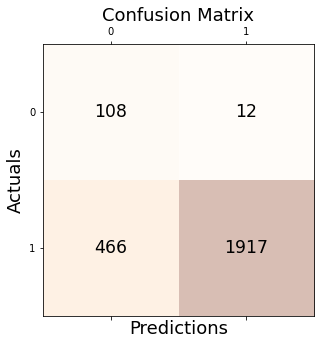

In [258]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [259]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one_2, outlier_alibi_one))
print('Precision: %.3f' % precision_score(outlier_true_one_2, outlier_alibi_one))
print('Recall: %.3f' % recall_score(outlier_true_one_2, outlier_alibi_one))
print('F1 Score: %.3f' % f1_score(outlier_true_one_2, outlier_alibi_one))

Accuracy: 0.809
Precision: 0.994
Recall: 0.804
F1 Score: 0.889


### 5. IForest

In [260]:
_df = pd.DataFrame({'x' : _x, 'y' : _y, 'z' : _z, 'fnoise':f+noise})

In [261]:
od.fit(_df[['x', 'y','z','fnoise']])

In [262]:
preds = od.predict(
    _df[['x', 'y','z','fnoise']],
    return_instance_score=True
)

<AxesSubplot:xlabel='x', ylabel='y'>

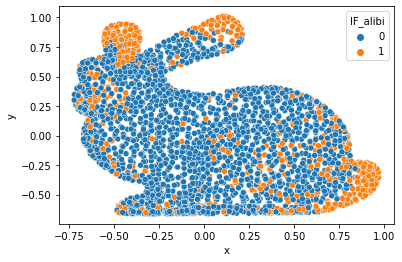

In [263]:
_df['IF_alibi'] = preds['data']['is_outlier']
sns.scatterplot(data = _df, x = 'x', y = 'y', hue = 'IF_alibi')

In [264]:
outlier_alibi_one = _df['IF_alibi']

In [265]:
outlier_alibi_one = list(map(lambda x: 1 if x==0  else -1,outlier_alibi_one))

In [266]:
conf_matrix = confusion_matrix(outlier_true_one_2, outlier_alibi_one)

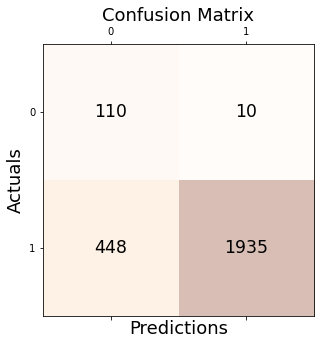

In [267]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [268]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one_2, outlier_alibi_one))
print('Precision: %.3f' % precision_score(outlier_true_one_2, outlier_alibi_one))
print('Recall: %.3f' % recall_score(outlier_true_one_2, outlier_alibi_one))
print('F1 Score: %.3f' % f1_score(outlier_true_one_2, outlier_alibi_one))

Accuracy: 0.817
Precision: 0.995
Recall: 0.812
F1 Score: 0.894


### 6. HBOS

In [269]:
HBOS_clf = HBOS()
HBOS_clf.fit(_df[['x', 'y','fnoise']])

HBOS(alpha=0.1, contamination=0.1, n_bins=10, tol=0.5)

In [270]:
_df['HBOS_clf'] = HBOS_clf.labels_

<AxesSubplot:xlabel='x', ylabel='y'>

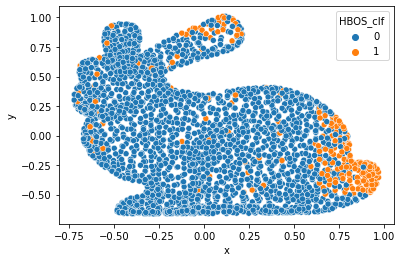

In [271]:
sns.scatterplot(data = _df, x = 'x', y = 'y', hue = 'HBOS_clf')

In [272]:
outlier_HBOS_one = list(HBOS_clf.labels_)

In [273]:
outlier_HBOS_one = list(map(lambda x: 1 if x==0  else -1,outlier_HBOS_one))

In [274]:
conf_matrix = confusion_matrix(outlier_true_one_2, outlier_HBOS_one)

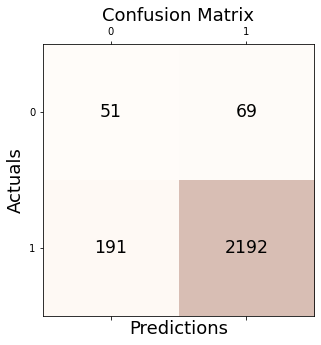

In [275]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [276]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one_2, outlier_HBOS_one))
print('Precision: %.3f' % precision_score(outlier_true_one_2, outlier_HBOS_one))
print('Recall: %.3f' % recall_score(outlier_true_one_2, outlier_HBOS_one))
print('F1 Score: %.3f' % f1_score(outlier_true_one_2, outlier_HBOS_one))

Accuracy: 0.896
Precision: 0.969
Recall: 0.920
F1 Score: 0.944


### 7. SO_GAAL

In [277]:
SO_GAAL_clf = SO_GAAL()
SO_GAAL_clf.fit(_df[['x', 'y','fnoise']])

Epoch 1 of 60

Testing for epoch 1 index 1:


/home/csy/anaconda3/envs/csy/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)



Testing for epoch 1 index 2:

Testing for epoch 1 index 3:

Testing for epoch 1 index 4:

Testing for epoch 1 index 5:
Epoch 2 of 60

Testing for epoch 2 index 1:

Testing for epoch 2 index 2:

Testing for epoch 2 index 3:

Testing for epoch 2 index 4:

Testing for epoch 2 index 5:
Epoch 3 of 60

Testing for epoch 3 index 1:

Testing for epoch 3 index 2:

Testing for epoch 3 index 3:

Testing for epoch 3 index 4:

Testing for epoch 3 index 5:
Epoch 4 of 60

Testing for epoch 4 index 1:

Testing for epoch 4 index 2:

Testing for epoch 4 index 3:

Testing for epoch 4 index 4:

Testing for epoch 4 index 5:
Epoch 5 of 60

Testing for epoch 5 index 1:

Testing for epoch 5 index 2:

Testing for epoch 5 index 3:

Testing for epoch 5 index 4:

Testing for epoch 5 index 5:
Epoch 6 of 60

Testing for epoch 6 index 1:

Testing for epoch 6 index 2:

Testing for epoch 6 index 3:

Testing for epoch 6 index 4:

Testing for epoch 6 index 5:
Epoch 7 of 60

Testing for epoch 7 index 1:

Testing for epo

SO_GAAL(contamination=0.1, decay=1e-06, lr_d=0.01, lr_g=0.0001, momentum=0.9,
    stop_epochs=20)

In [278]:
_df['SO_GAAL_clf'] = SO_GAAL_clf.labels_

<AxesSubplot:xlabel='x', ylabel='y'>

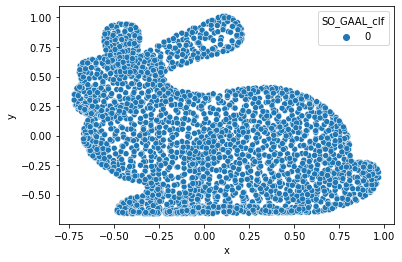

In [279]:
sns.scatterplot(data = _df, x = 'x', y = 'y', hue = 'SO_GAAL_clf')

In [280]:
outlier_SO_GAAL_clf_one = list(SO_GAAL_clf.labels_)

In [281]:
outlier_SO_GAAL_clf_one = list(map(lambda x: 1 if x==0  else -1,outlier_SO_GAAL_clf_one))

In [282]:
conf_matrix = confusion_matrix(outlier_true_one_2, outlier_SO_GAAL_clf_one)

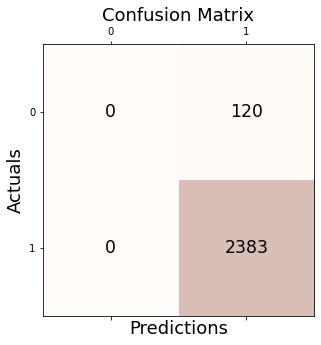

In [283]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [284]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one_2, outlier_SO_GAAL_clf_one))
print('Precision: %.3f' % precision_score(outlier_true_one_2, outlier_SO_GAAL_clf_one))
print('Recall: %.3f' % recall_score(outlier_true_one_2, outlier_SO_GAAL_clf_one))
print('F1 Score: %.3f' % f1_score(outlier_true_one_2, outlier_SO_GAAL_clf_one))

Accuracy: 0.952
Precision: 0.952
Recall: 1.000
F1 Score: 0.975


### 8. MCD

In [285]:
MCD_clf = MCD()
MCD_clf.fit(_df[['x', 'y','fnoise']])

MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None)

In [286]:
_df['MCD_clf'] = MCD_clf.labels_

<AxesSubplot:xlabel='x', ylabel='y'>

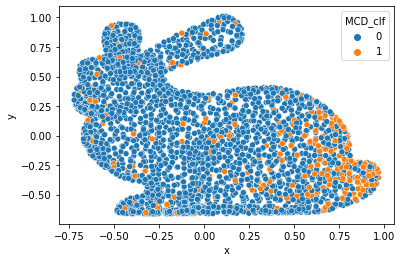

In [287]:
sns.scatterplot(data = _df, x = 'x', y = 'y', hue = 'MCD_clf')

In [288]:
outlier_MCD_one = list(MCD_clf.labels_)

In [289]:
outlier_MCD_one = list(map(lambda x: 1 if x==0  else -1,outlier_MCD_one))

In [290]:
conf_matrix = confusion_matrix(outlier_true_one_2, outlier_MCD_one)

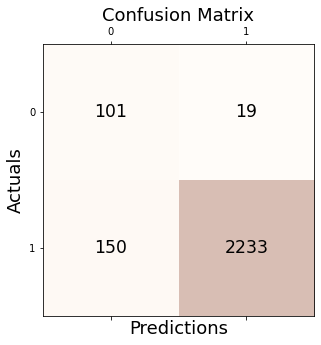

In [291]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [292]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one_2, outlier_MCD_one))
print('Precision: %.3f' % precision_score(outlier_true_one_2, outlier_MCD_one))
print('Recall: %.3f' % recall_score(outlier_true_one_2, outlier_MCD_one))
print('F1 Score: %.3f' % f1_score(outlier_true_one_2, outlier_MCD_one))

Accuracy: 0.932
Precision: 0.992
Recall: 0.937
F1 Score: 0.964


### 9. MO_GAAL

In [293]:
MO_GAAL_clf = MO_GAAL()
MO_GAAL_clf.fit(_df[['x', 'y','fnoise']])

/home/csy/anaconda3/envs/csy/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1 of 60

Testing for epoch 1 index 1:

Testing for epoch 1 index 2:

Testing for epoch 1 index 3:

Testing for epoch 1 index 4:

Testing for epoch 1 index 5:
Epoch 2 of 60

Testing for epoch 2 index 1:

Testing for epoch 2 index 2:

Testing for epoch 2 index 3:

Testing for epoch 2 index 4:

Testing for epoch 2 index 5:
Epoch 3 of 60

Testing for epoch 3 index 1:

Testing for epoch 3 index 2:

Testing for epoch 3 index 3:

Testing for epoch 3 index 4:

Testing for epoch 3 index 5:
Epoch 4 of 60

Testing for epoch 4 index 1:

Testing for epoch 4 index 2:

Testing for epoch 4 index 3:

Testing for epoch 4 index 4:

Testing for epoch 4 index 5:
Epoch 5 of 60

Testing for epoch 5 index 1:

Testing for epoch 5 index 2:

Testing for epoch 5 index 3:

Testing for epoch 5 index 4:

Testing for epoch 5 index 5:
Epoch 6 of 60

Testing for epoch 6 index 1:

Testing for epoch 6 index 2:

Testing for epoch 6 index 3:

Testing for epoch 6 index 4:

Testing for epoch 6 index 5:
Epoch 7 of 60

T

MO_GAAL(contamination=0.1, decay=1e-06, k=10, lr_d=0.01, lr_g=0.0001,
    momentum=0.9, stop_epochs=20)

In [294]:
_df['MO_GAAL_clf'] = MO_GAAL_clf.labels_

<AxesSubplot:xlabel='x', ylabel='y'>

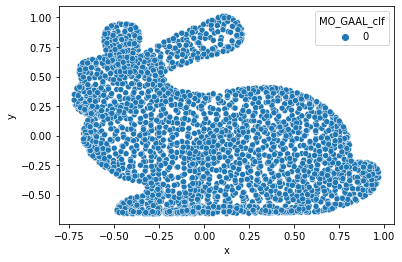

In [295]:
sns.scatterplot(data = _df, x = 'x', y = 'y', hue = 'MO_GAAL_clf')

In [296]:
outlier_MO_GAAL_clf_one = list(MO_GAAL_clf.labels_)

In [297]:
outlier_MO_GAAL_clf_one = list(map(lambda x: 1 if x==0  else -1,outlier_MO_GAAL_clf_one))

In [298]:
conf_matrix = confusion_matrix(outlier_true_one_2, outlier_MO_GAAL_clf_one)

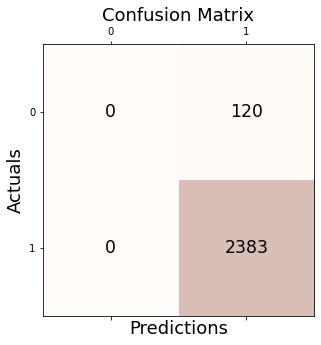

In [299]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [300]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one_2, outlier_MO_GAAL_clf_one))
print('Precision: %.3f' % precision_score(outlier_true_one_2, outlier_MO_GAAL_clf_one))
print('Recall: %.3f' % recall_score(outlier_true_one_2, outlier_MO_GAAL_clf_one))
print('F1 Score: %.3f' % f1_score(outlier_true_one_2, outlier_MO_GAAL_clf_one))

Accuracy: 0.952
Precision: 0.952
Recall: 1.000
F1 Score: 0.975


### 10. LSCP

In [301]:
detectors = [KNN(), LOF(), OCSVM()]

In [302]:
LSCP_clf = LSCP(detectors)

In [303]:
LSCP_clf.fit(_df[['x', 'y','fnoise']])

/home/csy/anaconda3/envs/csy/lib/python3.8/site-packages/pyod/models/lscp.py:382: UserWarning: The number of histogram bins is greater than the number of classifiers, reducing n_bins to n_clf.
  warnings.warn(
/home/csy/anaconda3/envs/csy/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


LSCP(contamination=0.1,
   detector_list=[KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0), LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2), OCSVM(cache_size=200, coef0=0.0, contamination=0.1, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
   verbose=False)],
   local_max_features=1.0, local_region_size=30, n_bins=3,
   random_state=RandomState(MT19937) at 0x7F4F53335B40)

In [304]:
_df['LSCP_clf'] = LSCP_clf.labels_

<AxesSubplot:xlabel='x', ylabel='y'>

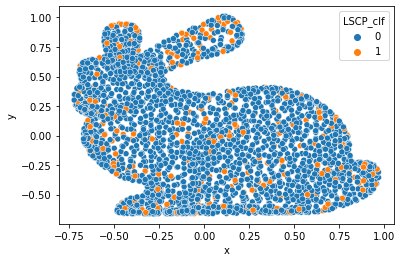

In [305]:
sns.scatterplot(data = _df, x = 'x', y = 'y', hue = 'LSCP_clf')

In [306]:
outlier_LSCP_one = list(LSCP_clf.labels_)

In [307]:
outlier_LSCP_one = list(map(lambda x: 1 if x==0  else -1,outlier_LSCP_one))

In [308]:
conf_matrix = confusion_matrix(outlier_true_one_2, outlier_LSCP_one)

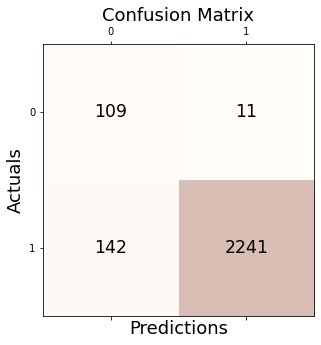

In [309]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [310]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one_2, outlier_LSCP_one))
print('Precision: %.3f' % precision_score(outlier_true_one_2, outlier_LSCP_one))
print('Recall: %.3f' % recall_score(outlier_true_one_2, outlier_LSCP_one))
print('F1 Score: %.3f' % f1_score(outlier_true_one_2, outlier_LSCP_one))

Accuracy: 0.939
Precision: 0.995
Recall: 0.940
F1 Score: 0.967


### 11. Feature Bagging

In [311]:
FeatureBagging_clf = FeatureBagging()
FeatureBagging_clf.fit(_df[['x', 'y','fnoise']])

FeatureBagging(base_estimator=None, bootstrap_features=False,
        check_detector=True, check_estimator=False, combination='average',
        contamination=0.1, estimator_params={}, max_features=1.0,
        n_estimators=10, n_jobs=1, random_state=None, verbose=0)

In [312]:
_df['FeatureBagging_clf'] = FeatureBagging_clf.labels_

<AxesSubplot:xlabel='x', ylabel='y'>

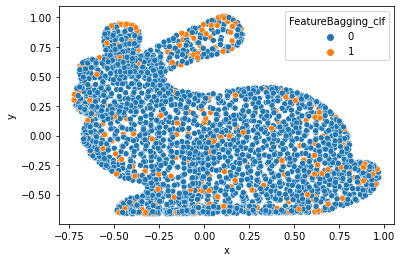

In [313]:
sns.scatterplot(data = _df, x = 'x', y = 'y', hue = 'FeatureBagging_clf')

In [314]:
outlier_FeatureBagging_one = list(FeatureBagging_clf.labels_)

In [315]:
outlier_FeatureBagging_one = list(map(lambda x: 1 if x==0  else -1,outlier_FeatureBagging_one))

In [316]:
conf_matrix = confusion_matrix(outlier_true_one_2, outlier_FeatureBagging_one)

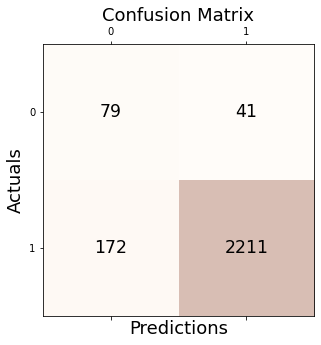

In [317]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [318]:
print('Accuracy: %.3f' % accuracy_score(outlier_true_one_2, outlier_FeatureBagging_one))
print('Precision: %.3f' % precision_score(outlier_true_one_2, outlier_FeatureBagging_one))
print('Recall: %.3f' % recall_score(outlier_true_one_2, outlier_FeatureBagging_one))
print('F1 Score: %.3f' % f1_score(outlier_true_one_2, outlier_FeatureBagging_one))

Accuracy: 0.915
Precision: 0.982
Recall: 0.928
F1 Score: 0.954
